In [13]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [ ]:
sound_file = "../../audio_files/munch.wav"

# 1. Checking out .wav files
Find out the sample rate, bit depth, and number of channels of `munch.wav`

In [29]:
from scipy.io import wavfile

sample_rate, audio_data = wavfile.read(sound_file)
print(f"Sample Rate: {sample_rate} Hz")
print(f"Bit Depth: {audio_data.dtype}") 
print(f"Channels: {audio_data.shape[1] if len(audio_data.shape) > 1 else 1}")


Sample Rate: 48000 Hz
Bit Depth: int16
Channels: 2


# 2. Visualizing the waveform 
A waveform graphically represents sound's amplitude variations over time, acting as an audio fingerprint. The x-axis shows time, while the y-axis displays normalized amplitude from -1 to 1.

Key features visible in waveforms:
* **Peaks**: Indicate loud moments like drum hits  
* **Zero Crossings**: Points where amplitude crosses zero, important for speech analysis
* **Envelope**: Overall loudness contour

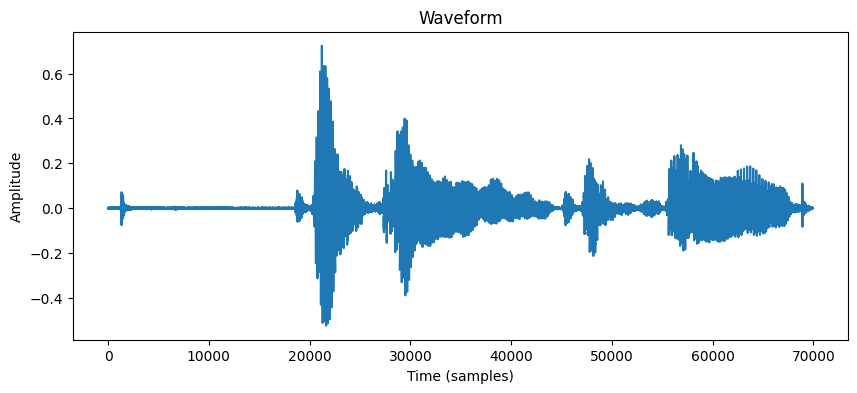

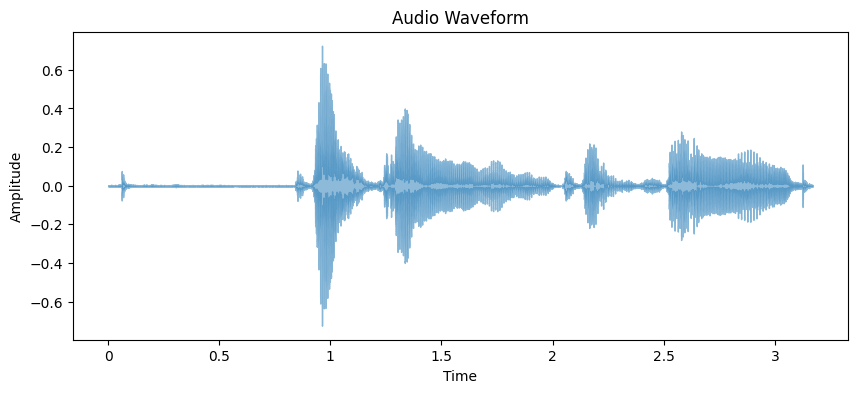

In [32]:
y, sr = librosa.load(sound_file)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# alternatively:
# Configure plot
plt.figure(figsize=(10, 4))
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Plot with time axis
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.show()

## Waveform exercise: 
Record different sounds (clap, vowel sounds) and compare their waveforms. What do you see?
[Go here for recording](https://products.aspose.app/audio/voice-recorder/wav) and modify code below to visualize.  

In [ ]:
# modify this code!
my_sound = None # file path to your sound
y, sr = librosa.load(my_sound)

# Configure plot
plt.figure(figsize=(10, 4))
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Plot with time axis
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.show()

# 3. Visualizing with spectrograms
While waveforms show amplitude changes, spectrograms reveal frequency components over time-answering "what pitches are present when?"

They use color intensity (typically a heat map) to represent energy at specific frequency bands.


**The Science Behind Spectrograms**
* **Short-Time Fourier Transform (STFT):** Divides audio into short segments (windows) and computes their frequency content
* **Decibel Conversion:** Amplitude values convert to dB scale for better perceptual accuracy
* **Time-Frequency Tradeoff:** Longer windows improve frequency resolution but blur time details


Interpreting Spectrogram Features:
* **Horizontal Lines:** Constant frequencies (e.g., musical notes)
* **Vertical Striations:** Rapid amplitude changes (consonants in speech)
* **Formants:** Dark bands in vowel sounds indicating vocal tract resonances

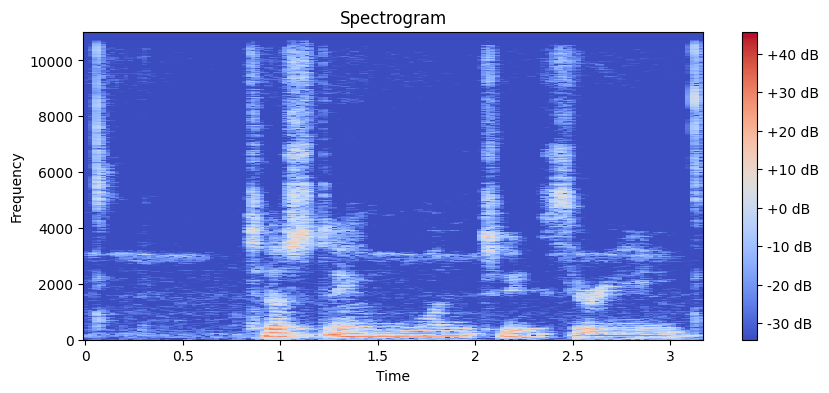

In [28]:
# Create a spectrogram
plt.figure(figsize=(10, 4))
S = librosa.stft(y)  # Short-time Fourier transform
S_db = librosa.amplitude_to_db(abs(S))  # Convert amplitude to decibels

librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# 4. Experimenting
The code below creates a sound. By default, it is a single tone modulated up and down with `noise` added. Try some of the following:

* increasing and decreasing the `sampling rate (fs)`
    * what happens to time?
* removing the `+ noise` on `x`
    * what happens to the sound? how about the spectrogram and waveform plots?
* generating a sound at a set sampling rate, but changing the sampling rate on the audio player
    * what happens to the sound?
* adding sounds together, such as the generated one and the one from `munch.wav`. **Hint**: the signals need to be of equal length.  

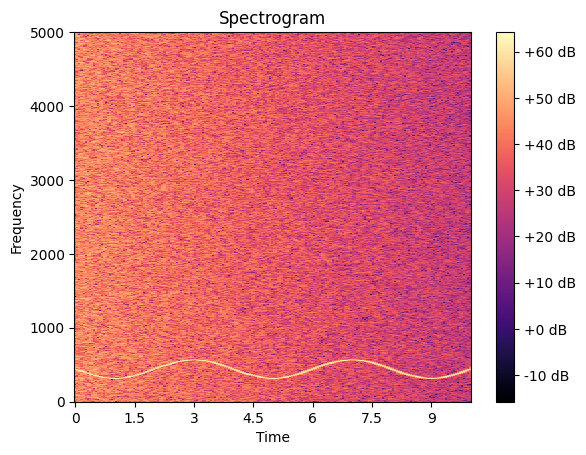

In [ ]:
# generating a sound
rng = np.random.default_rng()
# this is the sample rate (10kHz)
fs = 10e3
# the number of samples (100,000)
N = 1e5
# the amplitude (loudness)
amp = 2 * np.sqrt(2)
# if we add "noise"
noise_power = 0.01 * fs / 2

time = np.arange(N) / float(fs)
# modulation following a cosine wave slowly of 500 to -500 frequency 
mod = 500*np.cos(2*np.pi*0.25*time)
# the main sound -- frequency of 440 + the modulation times the amplitude
carrier = amp * np.sin(2*np.pi*440*time + mod)
# generating the noise to add 
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)

# putting the signal together -- carrier + noise
x = carrier + noise

# some conversions for spectrogram
X = librosa.stft(x)
X_db = librosa.amplitude_to_db(abs(X))

# plotting the spectrogram
librosa.display.specshow(X_db, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

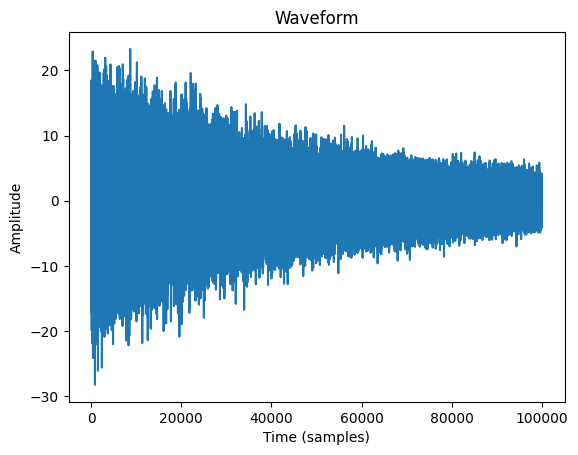

In [21]:
plt.plot(x)
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
Audio(x, rate=fs, autoplay=True)